In [63]:
# Check Python Version
import sys
sys.version
sys.version_info
import platform
print(platform.python_version())
 
 
# Check Keras and Tensorflow environment
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
# tensorflow
import tensorflow
print('tensorflow: %s' % tensorflow.__version__)
# keras
import keras
print('keras: %s' % keras.__version__)
 
#tensorflow: 1.3.0
#keras: 2.0.6

#pip install pandas-profiling
 


'3.7.3 (default, Apr 24 2019, 15:29:51) [MSC v.1915 64 bit (AMD64)]'

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

3.7.3
tensorflow: 1.14.0
keras: 2.2.4


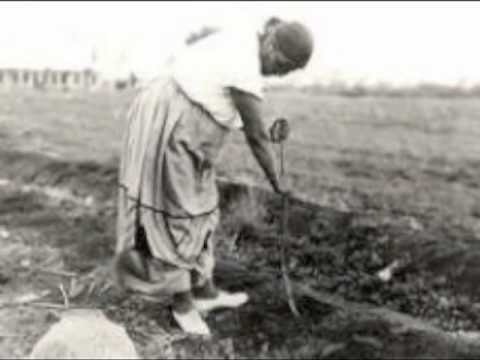

In [64]:
# import libaries
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc,recall_score,precision_score,accuracy_score,f1_score
%matplotlib inline

import pandas_profiling

# What this case is all about?
from IPython.display import YouTubeVideo
YouTubeVideo("pN4HqWRybwk")

In [65]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

**Importing data**

In [66]:
# Import data
df=pd.read_csv("diabetes.csv",sep=',')


**EDA**

In [67]:
type(df)
df.size
df.shape
df.head()
df.tail()

pandas.core.frame.DataFrame

6912

(768, 9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [68]:
pd.core.frame.DataFrame

pandas.core.frame.DataFrame

In [69]:
print ('Overall data summary')
df.describe()
 
print ('Counts of Labels')
df.groupby("Outcome").size()
 

Overall data summary


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Counts of Labels


Outcome
0    500
1    268
dtype: int64

In [70]:
268/768

0.3489583333333333

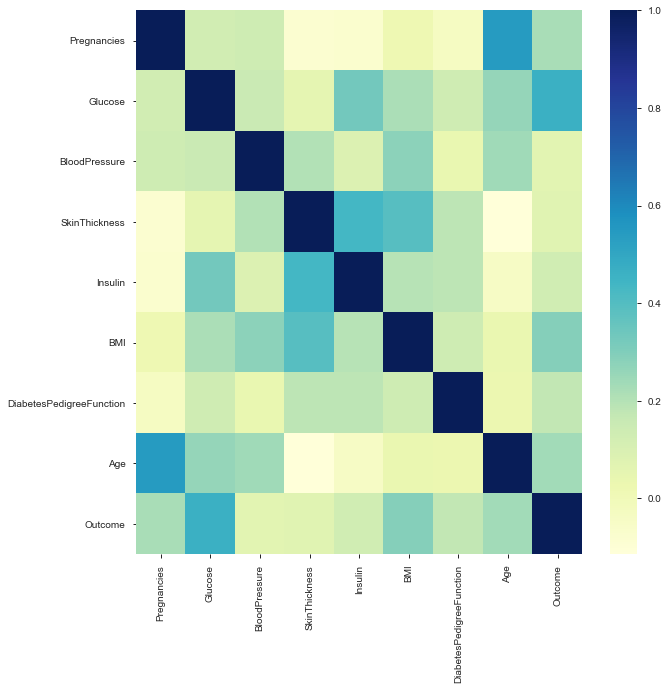

In [71]:
x = df.corr()
x
plt.subplots(figsize=(10,10))
sns.heatmap(x,cmap="YlGnBu")
plt.show();

In [72]:
eda_report = pandas_profiling.ProfileReport(df)
eda_report.to_file("Diabetes_EDA_Pandas_Profiling.html")

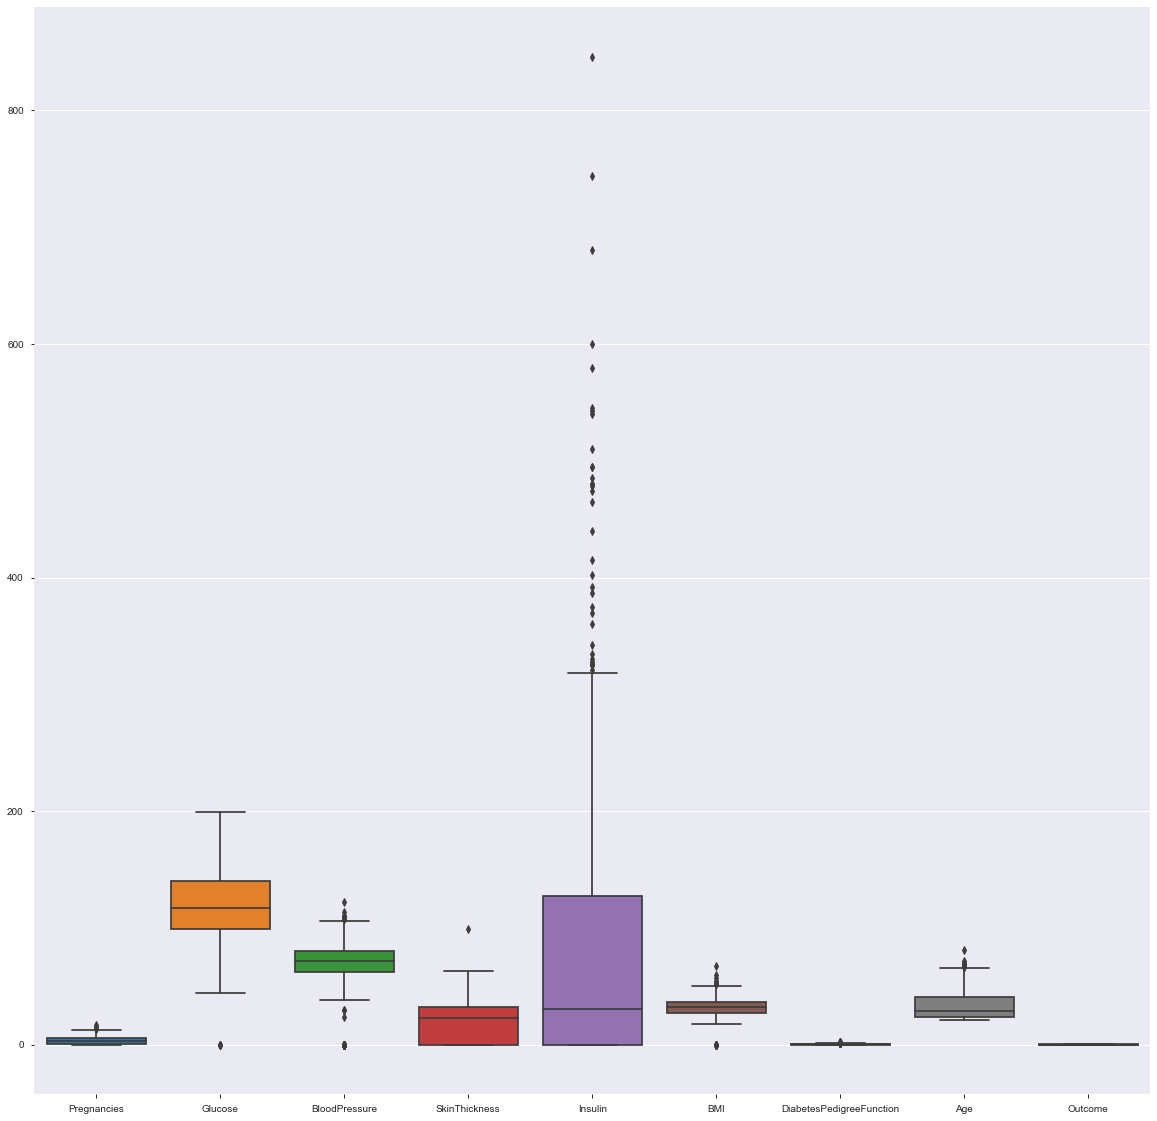

In [73]:
plt.subplots(figsize=(20,20))
sns.boxplot(data=df)
plt.show();


In [74]:
# Create Features and Labels and Standardize data
Y = df.iloc[:,8]
X= df.iloc[:,0:8]
std = StandardScaler()
X_Features= std.fit_transform(X)
# Create train and test data 75% and 25% split
train_x, test_x, train_y, test_y = train_test_split(X_Features, Y, test_size=0.25, random_state=1)
train_x.shape
test_x.shape
train_y.shape
test_y.shape
type(train_x)

(576, 8)

(192, 8)

(576,)

(192,)

numpy.ndarray

In [75]:
np.ndarray
# Build Deep Learning Model
model = Sequential()
model.add(Dense(512, input_dim =8))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
 
train_x = np.array(train_x)
train_y = np.array(train_y)
# Fit the model
model.fit(train_x,train_y, epochs=10, batch_size=128)

numpy.ndarray

Epoch 1/10
576/576 [==============================] - 1s 2ms/step - loss: 0.6453 - acc: 0.6319
Epoch 2/10
576/576 [==============================] - 0s 162us/step - loss: 0.5639 - acc: 0.6962
Epoch 3/10
576/576 [==============================] - 0s 132us/step - loss: 0.4926 - acc: 0.7587
Epoch 4/10
576/576 [==============================] - 0s 203us/step - loss: 0.4887 - acc: 0.7448
Epoch 5/10
576/576 [==============================] - 0s 143us/step - loss: 0.4770 - acc: 0.7552
Epoch 6/10
576/576 [==============================] - 0s 115us/step - loss: 0.4619 - acc: 0.7899
Epoch 7/10
576/576 [==============================] - 0s 115us/step - loss: 0.4642 - acc: 0.7812
Epoch 8/10
576/576 [==============================] - 0s 141us/step - loss: 0.4501 - acc: 0.7812
Epoch 9/10
576/576 [==============================] - 0s 137us/step - loss: 0.4460 - acc: 0.7865
Epoch 10/10
576/576 [==============================] - 0s 148us/step - loss: 0.4486 - acc: 0.7674


In [76]:

# evaluate the model
scores = model.evaluate(test_x, test_y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

192/192 [==============================] - 0s 1ms/step

acc: 80.21%


In [77]:
classes = model.predict_classes(test_x, batch_size=32, verbose=0)
print (classes.size)
print('Positive Cases in Test Data:', test_y[test_y == 1].shape[0])
print('Neagtive Cases in Test Data:', test_y[test_y == 0].shape[0])
print()
print()
print ('Accuracy Score')
print (metrics.accuracy_score(test_y, classes))
print()
print()
auc = metrics.roc_auc_score(test_y,classes)
print ('AUC')
print (auc)
print()
print()
print ('Precision/Recall Metrics')
print (metrics.classification_report(test_y,classes))

192
Positive Cases in Test Data: 69
Neagtive Cases in Test Data: 123


Accuracy Score
0.8020833333333334


AUC
0.7787203958996112


Precision/Recall Metrics
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       123
           1       0.74      0.70      0.72        69

    accuracy                           0.80       192
   macro avg       0.79      0.78      0.78       192
weighted avg       0.80      0.80      0.80       192



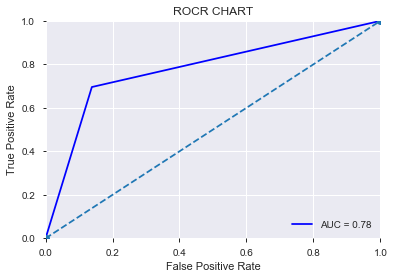

In [78]:
# ROC Chart
fpr, tpr, th= roc_curve(test_y, classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();